Task 1:

Write a function calculator(operation) that performs basic operations(add, subtract, multiply,
and divide). The function takes one argument, operation, and returns a lambda function. Inside
calculator, use a nested function that accepts two integers, x and y, and computes the result
based on the specified operation.

Requirements:

• If operation is invalid, the lambda should raise a ValueError with "Invalid operation".

• Handle division by zero in the nested function by returning "Division by zero is not
allowed".

Expected Output:

add_fn = calculator("add")

print(add_fn(5, 3))

Output: 8

In [5]:
def calculator(operation):
  if operation == "add":
    return lambda x, y: x + y
  elif operation == "sub":
    return lambda x, y: x - y
  elif operation == "mul":
    return lambda x, y: x * y
  elif operation == "div":
    return lambda x, y: x / y if y != 0 else "Division by zero is not allowed!"
  else:
    raise ValueError("Invalid operation!")

add_fn = calculator("add")
print("5 + 3 = ", add_fn(5, 3))

5 + 3 =  8


Task 2:
Given the dataset students_score_data.csv you have to perform:

• Load the Data:

▪ Create a Pandas DataFrame with the above data.

▪ Display the first few rows.

• Fill the missing values:

▪ Fill the missing values with the average value of each column

▪ Remove the row where all three subjects’ marks are missing

▪ If the score in any subject is less than zero replace it with zero.

• Calculate the Average Score:

▪ Create a new column Average_Score that contains the average score of Math,
Science, and English for each student.
• Determine Pass/Fail Status:

▪ Add another column Pass_Status. A student is considered "Pass" if their
Average_Score is 75 or above, otherwise "Fail".

▪ Encode the Pass_Status column, 0 for Pass and 1 for Fail.

▪ Count the total number of students pass and calculate the percentage of pass
students.

• Determine top 3 students:

▪ Determine the top 3 based on total marks

• Display the Updated Data:

▪ Show the DataFrame with the new columns.

In [34]:
import pandas as pd

# Load the CSV file into a Pandas DataFrame
df = pd.read_csv("students_scores_data.csv")

# Display the first few rows of the initial dataset
print("Initial Data:")
print(df.head())

#  fill missing with NaN values
df.replace("", pd.NA, inplace=True)

# Conver columns to numeric values & trmobr invalid
df[['Math', 'Science', 'English']] = df[['Math', 'Science', 'English']].apply(pd.to_numeric, errors='coerce')

# inbuilt func to remove rows where all 3 missing 
df.dropna(subset=['Math', 'Science', 'English'], how='all', inplace=True)

# Replace negative scores with zero for each subject
# if zero bigger ie val negitive relace with zero
df['Math'] = df['Math'].apply(lambda x: max(0, x) if pd.notna(x) else x)
df['Science'] = df['Science'].apply(lambda x: max(0, x) if pd.notna(x) else x)
df['English'] = df['English'].apply(lambda x: max(0, x) if pd.notna(x) else x)

# Fill remaining NaN values with the mean of each respective column
df.fillna(df[['Math', 'Science', 'English']].mean(), inplace=True)

# Calculate the Average Score by averaging Math, Science, and English for each student
df["Average_Score"] = df[['Math', 'Science', 'English']].mean(axis=1)

# A student passes if their Average_Score is 75 or above
df["Pass_Status"] = df["Average_Score"].apply(lambda x: "0" if x >= 75 else "1")

# Encode the Pass_Status column: 0 for Pass, 1 for Fail
df["Pass_Status_Encoded"] = df["Pass_Status"].map({"Pass": 0, "Fail": 1})

# Count total students and passed students
total_students = len(df)
passed_students = (df["Pass_Status"] == "Pass").sum()

# Calculate the pass percentage
pass_percentage = (passed_students / total_students) * 100

# Display the total number of students passed and the pass percentage
print(f"Total Students Passed: {passed_students}")
print(f"Pass Percentage: {pass_percentage:.2f}%")

# Determine top 3 students based on total marks
df["Total_Marks"] = df[['Math', 'Science', 'English']].sum(axis=1)
top_3_students = df.nlargest(3, "Total_Marks")

# Display the top 3 students based on total marks
print("\nTop 3 Students:")
print(top_3_students)

print("\nUpdated Data:")
print(df.head())

Initial Data:
   Student_ID         Name Math  Science  English
0         101  Student_101   98     95.0     93.0
1         102  Student_102   88     99.0     92.0
2         103  Student_103   74     63.0     82.0
3         104  Student_104   67     61.0     83.0
4         105  Student_105   80     65.0     96.0
Total Students Passed: 34
Pass Percentage: 69.39%

Top 3 Students:
    Student_ID         Name  Math  Science  English  Average_Score  \
0          101  Student_101  98.0     95.0     93.0      95.333333   
11         112  Student_112  95.0     95.0     94.0      94.666667   
1          102  Student_102  88.0     99.0     92.0      93.000000   

   Pass_Status  Pass_Status_Encoded  Total_Marks  
0         Pass                    0        286.0  
11        Pass                    0        284.0  
1         Pass                    0        279.0  

Updated DataFrame:
   Student_ID         Name  Math  Science  English  Average_Score Pass_Status  \
0         101  Student_101  98.0 

Task 3:

Plot a scatter plot comparing Math vs. Science scores,

• where:

▪ Excellent: english >= 90

▪ Good: 75 <= english < 90

▪ Needs Improvement: english < 75

• The size of the points is
proportional to the English scores.

• Color the points based on their performance category ("Excellent," "Good," or "Needs
Improvement").

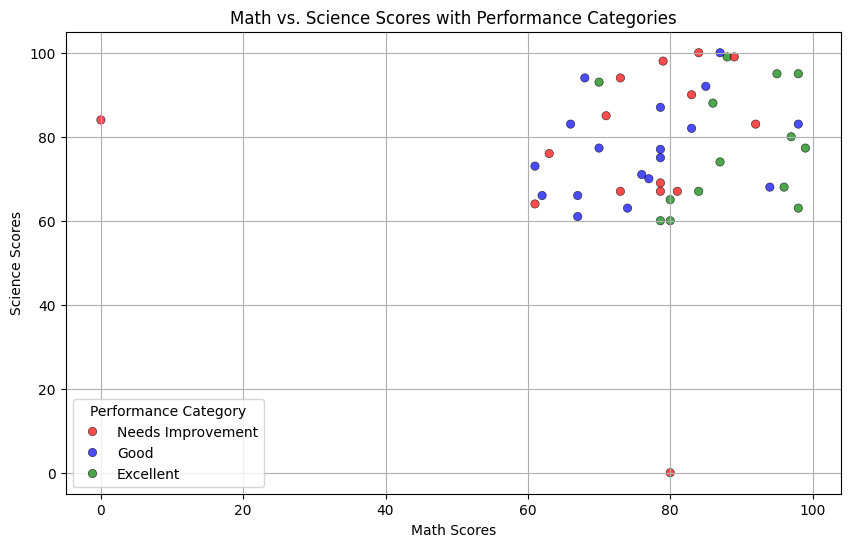

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


df["Performance_Category"] = pd.cut(df["English"], bins=[0, 75, 90, float("inf")], labels=["Needs Improvement", "Good", "Excellent"])

category_colors = {"Excellent": "green", "Good": "blue", "Needs Improvement": "red"}

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df["Math"], y=df["Science"],hue=df["Performance_Category"],palette=category_colors,  alpha=0.7,edgecolor="black")

plt.xlabel("Math Scores")
plt.ylabel("Science Scores")
plt.title("Math vs. Science Scores with Performance Categories")
plt.legend(title="Performance Category")
plt.grid(True)
plt.show()

Task 4:
You are given two arrays of random integers. Your task is to:

• Create two numpy arrays of size 10 with random integers between 1 and 100.

• Perform element-wise addition, subtraction, multiplication, and division on the two
arrays.

• Find the dot product of both arrays.

In [7]:
import numpy as np

array1 = np.random.randint(1, 101, size=10)
array2 = np.random.randint(1, 101, size=10)

print("\nArray 1:", array1)
print("\nArray 2:", array2)

print("\nAddition Result:", np.add(array1, array2))
print("Subtraction Result:", np.subtract(array1, array2))
print("Multiplication Result:", np.multiply(array1, array2))
print("Division Result:", np.divide(array1, array2))
print("Dot Product Result:", np.dot(array1, array2))


Array 1: [ 52  82  24   2 100  20  66  11   6  57]

Array 2: [10 17 88 69 84 43  1 95 10 35]

Addition Result: [ 62  99 112  71 184  63  67 106  16  92]
Subtraction Result: [ 42  65 -64 -67  16 -23  65 -84  -4  22]
Multiplication Result: [ 520 1394 2112  138 8400  860   66 1045   60 1995]
Division Result: [5.20000000e+00 4.82352941e+00 2.72727273e-01 2.89855072e-02
 1.19047619e+00 4.65116279e-01 6.60000000e+01 1.15789474e-01
 6.00000000e-01 1.62857143e+00]
Dot Product Result: 16590


Task 5:
You are given two 4x4 NumPy arrays filled with random integers between 1 and 100. Your
task is to:

• Add the two arrays element-wise.

• Subtract the second array from the first array element-wise.

• Multiply both arrays element-wise.

• Find the row-wise sum of both arrays.

• Compute the overall sum, mean, and standard deviation of the combined arrays.

In [9]:
import numpy as np

array1 = np.random.randint(1, 101, size=(4, 4))
array2 = np.random.randint(1, 101, size=(4, 4))

addition_result = np.add(array1, array2)
subtraction_result = np.subtract(array1, array2)
multiplication_result = np.multiply(array1, array2)
row_wise_sum_array1 = np.sum(array1, axis=1)
row_wise_sum_array2 = np.sum(array2, axis=1)
overall_sum = np.sum(addition_result)
overall_mean = np.mean(addition_result)
overall_std_dev = np.std(addition_result)

print("Array 1:")
print(array1)
print("Array 2:")
print(array2)
print("Addition Result:")
print(addition_result)
print("Subtraction Result:")
print(subtraction_result)
print("Multiplication Result:")
print(multiplication_result)
print("Row-wise Sum of Array 1:")
print(row_wise_sum_array1)
print("Row-wise Sum of Array 2:")
print(row_wise_sum_array2)
print("Overall Sum:", overall_sum)
print("Overall Mean:", overall_mean)
print("Overall Standard Deviation:", overall_std_dev)

Array 1:
[[ 4 10 72 96]
 [25 67  2 72]
 [74 17 59 76]
 [ 6 97 81 49]]
Array 2:
[[15 59 19 35]
 [76 39 62 98]
 [66 99 70 81]
 [62 10 36 49]]
Addition Result:
[[ 19  69  91 131]
 [101 106  64 170]
 [140 116 129 157]
 [ 68 107 117  98]]
Subtraction Result:
[[-11 -49  53  61]
 [-51  28 -60 -26]
 [  8 -82 -11  -5]
 [-56  87  45   0]]
Multiplication Result:
[[  60  590 1368 3360]
 [1900 2613  124 7056]
 [4884 1683 4130 6156]
 [ 372  970 2916 2401]]
Row-wise Sum of Array 1:
[182 166 226 233]
Row-wise Sum of Array 2:
[128 275 316 157]
Overall Sum: 1683
Overall Mean: 105.1875
Overall Standard Deviation: 36.80899813564613


Task 6:
Perform the following operations:

• Create the Array:

▪ Generate a 6x6 matrix of random integers between 0 and 100.

• Row/Column Calculations:

▪ Compute the mean, median, and standard deviation for each student (row).

▪ Compute the mean, max, and min for each subject (column).

• Identify Outliers:

▪ Replace outlier scores (those beyond 2 standard deviations from the mean of each
subject) with -1.

• Masked Array:

▪ Select students who scored above 90 in at least one subject and calculate their
average score.

• Top n Students:

▪ Implement a function to return the indices of the top n students based on their total
score across all subjects.

In [26]:
import numpy as np

# 6x6 random matrix
matrix = np.random.randint(0, 101, size=(6, 6))

# mean , median , std dev for each row
student_mean = np.mean(matrix, axis=1)
student_median = np.median(matrix, axis=1)
student_std_dev = np.std(matrix, axis=1)

# mean , max , min for each col
sub_mean = np.mean(matrix, axis=0)
sub_max_vals = np.max(matrix, axis=0)
sub_min_vals = np.min(matrix, axis=0)

#beyond 2 standard deviations from the mean of eachsubject
#vectorized approach
outliers = np.where(np.abs(matrix - np.mean(matrix, axis=0)) > 2 * np.std(matrix, axis=0))
matrix[outliers] = -1

#Select students who scored above 90 in at least one subject and calculate their avg
average_score_abv_90 = np.mean(matrix[student_mean > 90])

def get_top_n_students(matrix, n):
    # rowwise/student
    total_scores = np.sum(matrix, axis=1)
    sorted_indices = np.argsort(total_scores)[::-1]
    return sorted_indices[:n]

# top student index receivbed
# access them from matrix
top_n_indices = get_top_n_students(matrix, 5)
top_n_students = matrix[top_n_indices]
print("Top 5 Students:")
print(top_n_students)

Top 5 Students:
[[32 46 26 98 62 84]
 [21 -1 97 54 94 56]
 [ 2 51 31 79 65 79]
 [23 54 85 29 91 -1]
 [61 56  7 22 24 82]]
